# Session 12: Tidy Data and Data Types

## 1. Converting Data Types

In [1]:
import pandas as pd
df=pd.DataFrame([['3','NA'],['5','2'],['2','D']],columns=['A','B'])
df

,A,B
0,3,NA
1,5,2
2,2,D


In [2]:
df.dtypes

A    object
B    object
dtype: object

In [3]:
pd.to_numeric(df['A'])

0    3
1    5
2    2
Name: A, dtype: int64

In [4]:
pd.to_numeric(df['B'],errors='ignore')

0    NA
1     2
2     D
Name: B, dtype: object

In [5]:
pd.to_numeric(df['B'],errors='coeerce')

0    NaN
1    2.0
2    NaN
Name: B, dtype: float64

In [6]:
df['A']=pd.to_numeric(df['A'],errors='cooerce')
df['B']=pd.to_numeric(df['B'],errors='cooerce')
df.dtypes

A      int64
B    float64
dtype: object

In [7]:
df['B'].astype(str)

0    nan
1    2.0
2    nan
Name: B, dtype: object

In [8]:
df['B'].astype(str)[0]

'nan'

**Q1:** Create a `Series` object using the data from the following list, then convert it appropriately to numerical data and compute the sum.

```python
l=['Not Available','3.2','5','']
```

**Q2:** Load in the "Marshall_Course_Enrollment_1516_1617.xlsx" file from the classroom schedulling dataset (available on Blackboard and used in session 10), and convert the "Course Suffix" column to numerical format. Then compute the proportion of course suffixes that are 500 or above.

## 2. Melting Data

In [13]:
raw=pd.DataFrame([['A',0,1],['B',3,2]],columns=['Person','X','Y'])
raw

,Person,X,Y
0,A,0,1
1,B,3,2


In [14]:
raw.melt()

,variable,value
0,Person,A
1,Person,B
2,X,0
3,X,3
4,Y,1
5,Y,2


In [15]:
raw.melt(id_vars='Person')

,Person,variable,value
0,A,X,0
1,B,X,3
2,A,Y,1
3,B,Y,2


In [16]:
raw.melt(id_vars='Person',var_name='Item',value_name='Count')

,Person,Item,Count
0,A,X,0
1,B,X,3
2,A,Y,1
3,B,Y,2


In [17]:
import pandas as pd
base='https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/'
pew=pd.read_csv(base+'pew.csv')
pew.iloc[:4,:5]

,religion,<$10k,$10-20k,$20-30k,$30-40k
0,Agnostic,27,34,60,81
1,Atheist,12,27,37,52
2,Buddhist,27,21,30,34
3,Catholic,418,617,732,670


**Q3:** Run the above code to download the Pew Research Center data on income and religion in the US, and create a DataFrame called "melted" which aggregates the income data into one variable, as shown below.

In [19]:
melted.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


Melting the data as above allows you to more easily analyze the income data. For example, the following line plots a histogram of income for Hindus in the US.

In [20]:
melted.query('religion=="Hindu"').plot(x='income',y='count',kind='bar',legend=False)

## 3.  Pivoting (Un-Melting) Data

In [21]:
raw2=raw.melt(id_vars='Person',var_name='Item',value_name='Count')
raw2

,Person,Item,Count
0,A,X,0
1,B,X,3
2,A,Y,1
3,B,Y,2


In [22]:
raw2.pivot(index='Person',columns='Item',values='Count')

Item,X,Y
Person,,
A,0,1
B,3,2


In [23]:
raw2.pivot(index='Person',columns='Item',values='Count').reset_index()

Item,Person,X,Y
0,A,0,1
1,B,3,2


In [24]:
df=raw2.pivot(index='Person',columns='Item',values='Count').reset_index()
df.columns.name=''
df

,Person,X,Y
0,A,0,1
1,B,3,2


In [25]:
raw3=raw2.append({'Person':'A','Item':'X','Count':4},ignore_index=True)
raw3

,Person,Item,Count
0,A,X,0
1,B,X,3
2,A,Y,1
3,B,Y,2
4,A,X,4


In [26]:
raw3.pivot_table(index='Person',columns='Item',values='Count').reset_index()

Item,Person,X,Y
0,A,2,1
1,B,3,2


In [27]:
raw3.pivot_table(index='Person',columns='Item',values='Count',aggfunc='sum')\
    .reset_index()

Item,Person,X,Y
0,A,4,1
1,B,3,2


In [28]:
raw3.pivot_table(index='Person',columns='Item',values='Count',aggfunc='count')\
    .reset_index()

Item,Person,X,Y
0,A,2,1
1,B,1,1


**Q4:** Apply the `pivot` function on the DataFrame named "melted" you created from Q3, and reset the index so as to get back the original DataFrame.

## 4. Illustrations of Tidying Data

### 4.1 Tidying Tabular Data

In [30]:
weather=pd.read_csv(base+'weather.csv').drop('id',axis=1)
weather.iloc[:5,:7]

,year,month,element,d1,d2,d3,d4
0,2010,1,tmax,NaN,NaN,NaN,NaN
1,2010,1,tmin,NaN,NaN,NaN,NaN
2,2010,2,tmax,NaN,27.3,24.1,NaN
3,2010,2,tmin,NaN,14.4,14.4,NaN
4,2010,3,tmax,NaN,NaN,NaN,NaN


In [31]:
melted=weather.melt(id_vars=['year','month','element']\
                        ,var_name='day',value_name='temperature')
melted.head()

,year,month,element,day,temperature
0,2010,1,tmax,d1,NaN
1,2010,1,tmin,d1,NaN
2,2010,2,tmax,d1,NaN
3,2010,2,tmin,d1,NaN
4,2010,3,tmax,d1,NaN


In [32]:
pivoted=melted.pivot_table(index=['year','month','day'],columns='element'\
                               ,values='temperature').reset_index()
pivoted.head()

element,year,month,day,tmax,tmin
0,2010,1,d30,27.8,14.5
1,2010,2,d11,29.7,13.4
2,2010,2,d2,27.3,14.4
3,2010,2,d23,29.9,10.7
4,2010,2,d3,24.1,14.4


In [33]:
pivoted['day']=pivoted['day'].str.slice(1).astype(int)
pivoted.head()

element,year,month,day,tmax,tmin
0,2010,1,30,27.8,14.5
1,2010,2,11,29.7,13.4
2,2010,2,2,27.3,14.4
3,2010,2,23,29.9,10.7
4,2010,2,3,24.1,14.4


In [34]:
pivoted['date']=pd.to_datetime(pivoted[['year','month','day']])
pivoted=pivoted.set_index('date')
pivoted.head()

element,year,month,day,tmax,tmin
date,,,,,
2010-01-30,2010,1,30,27.8,14.5
2010-02-11,2010,2,11,29.7,13.4
2010-02-02,2010,2,2,27.3,14.4
2010-02-23,2010,2,23,29.9,10.7
2010-02-03,2010,2,3,24.1,14.4


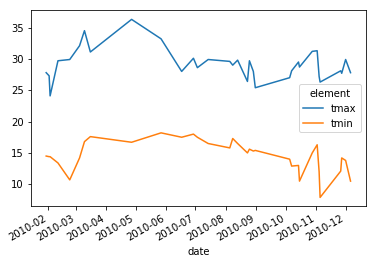

In [35]:
pivoted[['tmax','tmin']].plot()

### 4.2 Tidying the Ebola Dataset

In [36]:
import pandas as pd
base='https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/'
filename='country_timeseries.csv'
ebola=pd.read_csv(base+filename)
ebola['Date']=pd.to_datetime(ebola['Date'])
ebola.iloc[:5,:4]

,Date,Day,Cases_Guinea,Cases_Liberia
0,2015-01-05,289,2776.0,NaN
1,2015-01-04,288,2775.0,NaN
2,2015-01-03,287,2769.0,8166.0
3,2015-01-02,286,NaN,8157.0
4,2014-12-31,284,2730.0,8115.0


In [37]:
melted=ebola.melt(id_vars=['Day','Date'])
melted.head()

,Day,Date,variable,value
0,289,2015-01-05,Cases_Guinea,2776.0
1,288,2015-01-04,Cases_Guinea,2775.0
2,287,2015-01-03,Cases_Guinea,2769.0
3,286,2015-01-02,Cases_Guinea,NaN
4,284,2014-12-31,Cases_Guinea,2730.0


In [38]:
splitted=melted['variable'].str.split('_',expand=True)
splitted.head()

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea


In [39]:
splitted.columns=['kind','country']
melted2=pd.concat([melted,splitted],axis=1)
melted2.head()

,Day,Date,variable,value,kind,country
0,289,2015-01-05,Cases_Guinea,2776.0,Cases,Guinea
1,288,2015-01-04,Cases_Guinea,2775.0,Cases,Guinea
2,287,2015-01-03,Cases_Guinea,2769.0,Cases,Guinea
3,286,2015-01-02,Cases_Guinea,NaN,Cases,Guinea
4,284,2014-12-31,Cases_Guinea,2730.0,Cases,Guinea


In [40]:
ebola2=melted2.pivot_table(index=['Day','Date','country']\
                            ,columns='kind',values='value').reset_index()
ebola2.columns.name=''
ebola2.head()

,Day,Date,country,Cases,Deaths
0,0,2014-03-22,Guinea,49.0,29.0
1,2,2014-03-24,Guinea,86.0,59.0
2,3,2014-03-25,Guinea,86.0,60.0
3,4,2014-03-26,Guinea,86.0,62.0
4,5,2014-03-27,Guinea,103.0,66.0


In [41]:
ebola2.groupby('country')[['Cases','Deaths']].sum()\
    .sort_values(by='Cases',ascending=False)

,Cases,Deaths
country,,
SierraLeone,211181.0,60352.0
Liberia,193833.0,89198.0
Guinea,84729.0,51818.0
Nigeria,636.0,233.0
UnitedStates,59.0,15.0
Mali,42.0,38.0
Senegal,27.0,0.0
Spain,16.0,3.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5edd8f2ef0>,
      dtype=object)

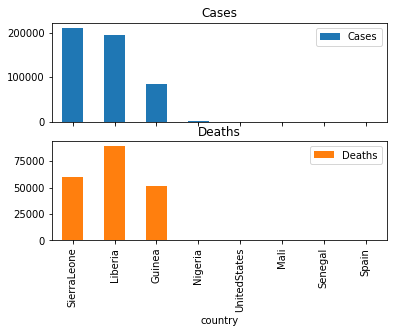

In [42]:
ebola2.groupby('country')[['Cases','Deaths']].sum()\
    .sort_values(by='Cases',ascending=False)\
    .plot(kind='bar',subplots=True)